In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
sys.path.append("../workstatation")

In [2]:
from imitation_learning.linear_regression import DMPTrajectory

In [3]:
def load_trajectories(num_trajectories):
    trajectories = []
    for i in range(1,num_trajectories + 1):
        trajectories.append(np.genfromtxt("../data/traj_cut_Dec_8_7_00_PM/traj_data_cut_" + str(i) + ".txt", dtype=float, delimiter=','))
    return trajectories

In [4]:
trajectories = load_trajectories(4)
print(len(trajectories))

4


In [5]:
def truncate_trajectories(trajectories):
    times = []
    poses_desired = []
    robot_states = []
    tau_js = []
    d_tau_js = []
    qs = []
    dqs = []
    
    for trajectory in trajectories:
        time = trajectory[:,0]
        pose_desired = trajectory[:,1:17]
        robot_state = trajectory[:,17:33]
        tau_j = trajectory[:,33:40]
        d_tau_j = trajectory[:,40:47]
        q = trajectory[:,47:54]
        dq = trajectory[:,54:61]
        
        start_trajectory_index = 0
        end_trajectory_index = q.shape[0] - 1
        num_saved_data_points = time.shape[0]
        previous_joint_positions = q[0,:]
        for i in range(1,num_saved_data_points):
            current_joint_positions = q[i,:]
            if(np.linalg.norm(previous_joint_positions - current_joint_positions) > 0.001):
                start_trajectory_index = i - 1
                break
                
        previous_joint_positions = q[-1,:]
        for i in reversed(range(0,num_saved_data_points-1)):
            current_joint_positions = q[i,:]
            if(np.linalg.norm(previous_joint_positions - current_joint_positions) > 0.001):
                end_trajectory_index = i + 2
                break
        print(start_trajectory_index)
        print(end_trajectory_index)
    
        trajectory_time = time[start_trajectory_index:end_trajectory_index]
        trajectory_pose_desired = pose_desired[start_trajectory_index:end_trajectory_index,:]
        trajectory_robot_state = robot_state[start_trajectory_index:end_trajectory_index,:]
        trajectory_tau_j = tau_j[start_trajectory_index:end_trajectory_index,:]
        trajectory_d_tau_j = d_tau_j[start_trajectory_index:end_trajectory_index,:]
        trajectory_q = q[start_trajectory_index:end_trajectory_index,:]
        trajectory_dq = dq[start_trajectory_index:end_trajectory_index,:]
        times.append(trajectory_time)
        poses_desired.append(trajectory_pose_desired)
        robot_states.append(trajectory_robot_state)
        tau_js.append(trajectory_tau_j)
        d_tau_js.append(trajectory_d_tau_j)
        qs.append(trajectory_q)
        dqs.append(trajectory_dq)
        
    return (times,poses_desired,robot_states,tau_js,d_tau_js,qs,dqs)
    

In [6]:
(times,poses_desired,robot_states,tau_js,d_tau_js,qs,dqs) = truncate_trajectories(trajectories)

318
1254
275
1502
154
1628
478
3597


In [7]:
def visualize_joint_trajectories(qs, joint_num):
    max_time_length = 0
    for q in qs:
        if(q.shape[0] > max_time_length):
            max_time_length = q.shape[0] 

    time = np.arange(max_time_length) * 0.033
    
    for q in qs:
        contracted_time = time[:q.shape[0]]
        plt.plot(contracted_time,q[:,joint_num])
    
    plt.show()

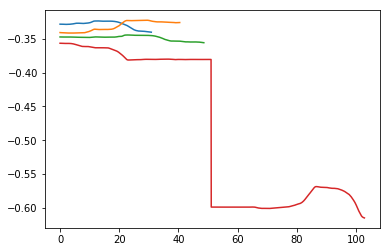

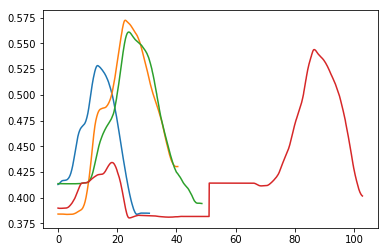

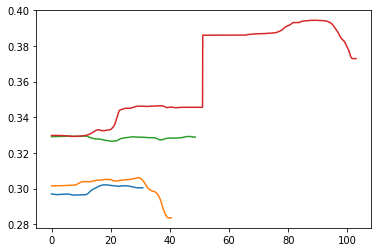

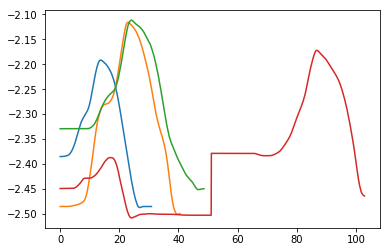

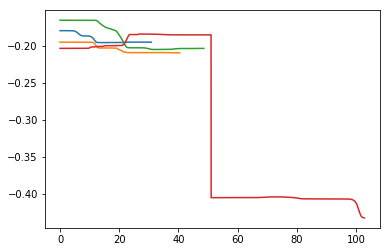

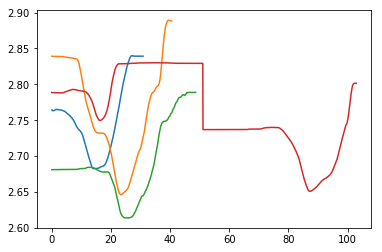

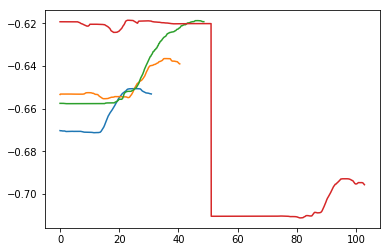

In [8]:
for i in range(7):
    visualize_joint_trajectories(qs,i)